# Zaptc ("zapticy")
Perturb the state of a node. Propagate potential node state changes downstream. Count the number of every (state0,state1) system-state transition as the network is walked.  Walk for a given number of time-steps. At each node the propagation spreads to all of its downstream nodes.

### Table of Contents <a id=toc>
* [Imports and setup](#init)
* [Create graph](#creategraph)
* [Run Zaptc](#zaptc)
* [Explore results](#results)

## Imports and setup <a id=init>

In [1]:
from random import choice
from collections import Counter
from statistics import mean

import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout, pydot_layout
import numpy as np

import pyphi.data_models as dm
from pyphi.zap_tc import Zaptc

In [2]:
N = 20 # number of Nodes in system
D = 3  # Degree; average number of connections from a node to downstream nodes
S = 2  # number of States per node
T = 10 # number of time steps to follow transitions

p = D/N

print(f'''
{N}\t# number of Nodes
{D}\t# maximum number of Connections from a node
{S}\t# number of States per node
{p}\t# probability of edge creation for each node pairing

{D**10:,}\t# average nodes changed as a result of propagation fan-out fron single node
''')
# {labels} # node labels


20	# number of Nodes
3	# maximum number of Connections from a node
2	# number of States per node
0.15	# probability of edge creation for each node pairing

59,049	# average nodes changed as a result of propagation fan-out fron single node



## Create graph <a id=creategraph>

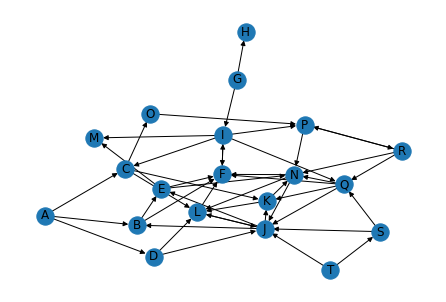

In [3]:
#g = nx.gnp_random_graph(60, 0.10, directed=True) # num_nodes, prob_edge
G = nx.gnp_random_graph(N, p, directed=True) # num_nodes, prob_edge
edges = list(G.edges())
net = dm.Net(edges=edges)

#Image(filename=png, width=500)
#nx.draw(net.graph, pos=pydot_layout(net.graph), with_labels=True, label='gnp_random_graph({N},{p})')
net.draw()

In [4]:
print(nx.info(net.graph))

label0 = sorted(net.graph.nodes())[0]
print()
print(f'label0="{label0}"')
print(f'Downstream nodes of {label0} = {list(net.graph.neighbors(label0))}')

Name: 
Type: DiGraph
Number of nodes: 20
Number of edges: 46
Average in degree:   2.3000
Average out degree:   2.3000

label0="A"
Downstream nodes of A = ['B', 'C', 'D']


### Change some individual nodes 

#### Add a state to node A (disabled)

#### Set node B to single state (disabled)

## Run Zaptc <a id=zaptc>

In [5]:
ztc = Zaptc(net=net)
ztc

In [6]:
len(ztc.net)

20

In [7]:
list(ztc.net.successors(label0))

['B', 'C', 'D']

In [8]:
list(ztc.net.get_node('A').states)

[0, 1]

In [9]:
start_state = '0'*len(ztc.net)
print(f'start_state = "{start_state}", start_label="{label0}"\n')
%time ztc.zap_tc(label0, start_state, T)

start_state = "00000000000000000000", start_label="A"

CPU times: user 73.2 ms, sys: 0 ns, total: 73.2 ms
Wall time: 72.3 ms


## Results <a id=results>

In [10]:
print(nx.info(net.graph))

Name: 
Type: DiGraph
Number of nodes: 20
Number of edges: 46
Average in degree:   2.3000
Average out degree:   2.3000


In [11]:
nstates = len(set([s1 for s1,s2 in ztc.transition_counter.keys()]).intersection([s2 for s1,s2 in ztc.transition_counter.keys()]))
print(f'Number of unique transitions = {len(ztc.transition_counter)}')
print(f'total transitions = {sum(ztc.transition_counter.values())}')
print(f'num system-states = {nstates}')
# state_list

Number of unique transitions = 9643
total transitions = 12256
num system-states = 2427


In [12]:
print(f'{len(ztc.transition_counter):,}\tUnique transitions observed')

9,643	Unique transitions observed


In [13]:
%time ztc.zapall(T)

Zap node=A state=01010100100011101111
Zap node=B state=11100010001001111101
Zap node=C state=11010111011100100111
Zap node=D state=10000011100110000110
Zap node=E state=11000100110000001010
Zap node=F state=11011001111000110010
Zap node=G state=10100001100011011110
Zap node=H state=01011010001001110111
Zap node=I state=11000111101000110111
Zap node=J state=11100011010001100110
Zap node=K state=00101100110111111101
Zap node=L state=00000011101000000011
Zap node=M state=00101011010010111000
Zap node=N state=10000011110000111100
Zap node=O state=01001011100001111011
Zap node=P state=00011000001001100101
Zap node=Q state=10110001101100001000
Zap node=R state=01010001111010100001
Zap node=S state=00010100010011010111
Zap node=T state=01001011110110001000
CPU times: user 1.38 s, sys: 8.69 ms, total: 1.39 s
Wall time: 1.38 s


In [14]:
nstates = len(set([s1 for s1,s2 in ztc.transition_counter.keys()]).union([s2 for s1,s2 in ztc.transition_counter.keys()]))
maxnstates = S**len(ztc.net)
print(f'''
{nstates:,}   \t Number of encountered states
{maxnstates:,}\t Number of possible states

{len(ztc.transition_counter):,}\t Unique transitions observed
{sum(ztc.transition_counter.values()):,}\t TOTAL transitions observed
{maxnstates**2:,}\t Number of POSSIBLE transitions
''')


86,696   	 Number of encountered states
1,048,576	 Number of possible states

190,291	 Unique transitions observed
246,858	 TOTAL transitions observed
1,099,511,627,776	 Number of POSSIBLE transitions

